In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [6]:
# download of isurance kaggle dataset
# https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download
data_path = "kaggle-dataset/insurance.csv"
df = pd.read_csv(data_path)

df.head()
df.info()
print(df.describe(include="all"))

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    Na

In [7]:
# Target and features
y = df["charges"].values.reshape(-1, 1)
X = df.drop(columns=["charges"])

numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")  # avoid dummy trap

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit on full X, then split (or split then fit on train only – both ok for this assignment)
X_processed = preprocessor.fit_transform(X)
X_processed = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1070, 8)
X_test shape: (268, 8)


In [8]:
class LinearRegressionBatchGD:
    def __init__(self, lr=0.01, n_epochs=1000):
        self.lr = lr
        self.n_epochs = n_epochs
        self.W = None
        self.b = None
        self.loss_history_ = []

    def _initialize_params(self, n_features):
        # Small random initialization
        self.W = np.random.randn(n_features, 1) * 0.01
        self.b = 0.0

    def predict(self, X):
        return X.dot(self.W) + self.b  # y_hat = XW + b

    def mse(self, y_true, y_pred):
        m = y_true.shape[0]
        return np.sum((y_pred - y_true) ** 2) / (2 * m)

    def fit(self, X, y):
        m, n_features = X.shape
        self._initialize_params(n_features)

        for epoch in range(self.n_epochs):
            # Forward pass
            y_pred = self.predict(X)

            # Loss
            loss = self.mse(y, y_pred)
            self.loss_history_.append(loss)

            # Gradients (batch)
            dW = (1 / m) * X.T.dot(y_pred - y)
            db = (1 / m) * np.sum(y_pred - y)

            # Parameter update
            self.W -= self.lr * dW
            self.b -= self.lr * db

            # Optional: print every 100 epochs
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.n_epochs}, Loss: {loss:.4f}")

        return self

In [9]:
# Hyperparameters
learning_rate = 0.01
epochs = 1000

model = LinearRegressionBatchGD(lr=learning_rate, n_epochs=epochs)
model.fit(X_train, y_train)

print("Final training loss:", model.loss_history_[-1])
print("Final weights shape:", model.W.shape)
print("Final bias:", model.b)

Epoch 100/1000, Loss: 53443600.5032
Epoch 200/1000, Loss: 40631731.8184
Epoch 300/1000, Loss: 34501473.0377
Epoch 400/1000, Loss: 30214364.6921
Epoch 500/1000, Loss: 27108623.5185
Epoch 600/1000, Loss: 24849214.0163
Epoch 700/1000, Loss: 23202770.7146
Epoch 800/1000, Loss: 22001288.9261
Epoch 900/1000, Loss: 21123249.1196
Epoch 1000/1000, Loss: 20480597.8723
Final training loss: 20480597.87228323
Final weights shape: (8, 1)
Final bias: 8307.031147720661


In [10]:
# Evaluate on test set
y_test_pred = model.predict(X_test)
test_mse = model.mse(y_test, y_test_pred)
print("Test MSE:", test_mse)


Test MSE: 19603762.307400726


In [11]:
# Show some predictions vs actual
for i in range(10):
    print(f"Sample {i}: Predicted = {y_test_pred[i, 0]:.2f}, Actual = {y_test[i, 0]:.2f}")


Sample 0: Predicted = 8458.34, Actual = 9095.07
Sample 1: Predicted = 7702.03, Actual = 5272.18
Sample 2: Predicted = 32960.42, Actual = 29330.98
Sample 3: Predicted = 11037.59, Actual = 9301.89
Sample 4: Predicted = 24080.99, Actual = 33750.29
Sample 5: Predicted = 12139.86, Actual = 4536.26
Sample 6: Predicted = 1117.79, Actual = 2117.34
Sample 7: Predicted = 17964.76, Actual = 14210.54
Sample 8: Predicted = 853.28, Actual = 3732.63
Sample 9: Predicted = 12703.24, Actual = 10264.44


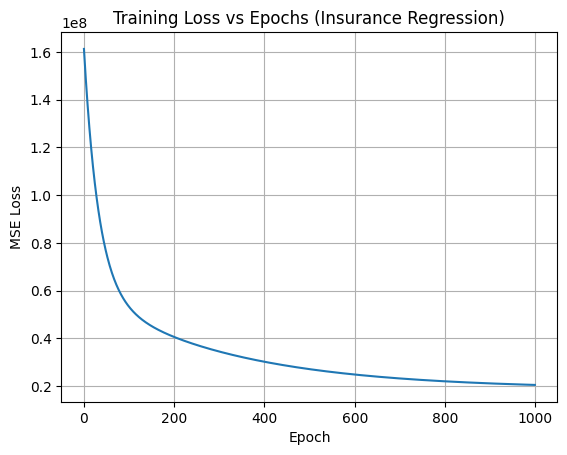

In [12]:
# Plot training loss over epochs
plt.plot(model.loss_history_)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss vs Epochs (Insurance Regression)")
plt.grid(True)
plt.show()
